In [1]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# ------------------------------------------------------------------------------
from scipy.stats import shapiro, kstest

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [23]:
df = pd.read_csv("continentes_sin_nulos.csv", index_col = 0)
df.head()

,country,density,abbreviation,agriculturalland,capital/majorcity,currency-code,forestedarea,grossprimaryeducationenrollment,largestcity,officiallanguage,populationlaborforceparticipation,taxrevenue,latitude,longitude,Continent,gasolineprice_i,lifeexpectancy_i,landarea_k,armedforcessize_k,birthrate_k,callingcode_k,co2-emissions_k,cpi_k,cpichange_k,fertilityrate_k,gdp_k,grosstertiaryeducationenrollment_k,infantmortality_k,maternalmortalityratio_k,minimumwage_k,outofpockethealthexpenditure_k,population_k,totaltaxrate_k,unemploymentrate_k,urban_population_k
0,Afghanistan,60.0,AF,58.1,Kabul,AFN,2.1,104.0,Kabul,Pashto,48.90,9.3,33.939110,67.709953,Asia,0.70,64.500000,652230.0,323000.0,32.49,93.0,8672.0,149.900,2.30,4.47,1.910135e+10,9.70,47.9,638.0,0.43,78.4,38041754.0,71.40,11.120,9797273.0
1,Albania,105.0,AL,43.1,Tirana,ALL,28.1,107.0,Tirana,Albanian,55.70,18.6,41.153332,20.168331,Europa,1.36,78.500000,28748.0,9000.0,11.78,355.0,4536.0,119.050,1.40,1.62,1.527808e+10,55.00,7.8,15.0,1.12,56.9,2854191.0,36.60,12.330,1747593.0
2,Algeria,18.0,DZ,17.4,Algiers,DZD,0.8,109.9,Algiers,Arabic,41.20,37.2,28.033886,1.659626,Asia,0.28,76.700000,2381741.0,317000.0,24.28,213.0,150006.0,151.360,2.00,3.02,1.699882e+11,51.40,20.1,112.0,0.95,28.1,43053054.0,66.10,11.700,31510100.0
3,Andorra,164.0,AD,40.0,Andorra la Vella,EUR,34.0,106.4,Andorra la Vella,Catalan,62.45,16.3,42.506285,1.521801,Europa,1.51,80.442372,468.0,10800.0,7.20,376.0,469.0,169.706,6.82,1.27,3.154058e+09,9.82,2.7,436.8,6.63,36.4,77142.0,34.84,8.058,67873.0
4,Angola,26.0,AO,47.5,Luanda,AOA,46.3,113.5,Luanda,Portuguese,77.50,9.2,-11.202692,17.873887,Africa,0.97,60.800000,1246700.0,117000.0,40.73,244.0,34693.0,261.730,17.10,5.52,9.463542e+10,9.30,51.6,241.0,0.71,33.4,31825295.0,49.10,6.890,21061025.0


1. Calcula las siguientes estadísticas descriptivas para las variables numéricas:
Media
Mediana
Desviación estándar
Mínimo
Máximo

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 0 to 194
Data columns (total 35 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   country                             195 non-null    object 
 1   density                             195 non-null    float64
 2   abbreviation                        195 non-null    object 
 3   agriculturalland                    195 non-null    float64
 4   capital/majorcity                   195 non-null    object 
 5   currency-code                       195 non-null    object 
 6   forestedarea                        195 non-null    float64
 7   grossprimaryeducationenrollment     195 non-null    float64
 8   largestcity                         195 non-null    object 
 9   officiallanguage                    195 non-null    object 
 10  populationlaborforceparticipation   195 non-null    float64
 11  taxrevenue                          195 non-n

In [7]:
#variables_numeros = df[df.columns].select_dtypes(include = "float64")
#variables_numeros.columns

Index(['density', 'agriculturalland', 'forestedarea',
       'grossprimaryeducationenrollment', 'populationlaborforceparticipation',
       'taxrevenue', 'latitude', 'longitude', 'gasolineprice_i',
       'lifeexpectancy_i', 'landarea_k', 'armedforcessize_k', 'birthrate_k',
       'callingcode_k', 'co2-emissions_k', 'cpi_k', 'cpichange_k',
       'fertilityrate_k', 'gdp_k', 'grosstertiaryeducationenrollment_k',
       'infantmortality_k', 'maternalmortalityratio_k', 'minimumwage_k',
       'outofpockethealthexpenditure_k', 'population_k', 'totaltaxrate_k',
       'unemploymentrate_k', 'urban_population_k'],
      dtype='object')

In [25]:

variables_numeros = df.select_dtypes(include='float64')

estadisticas_descriptivas = variables_numeros.agg(['mean', 'median', 'std', 'min', 'max'])

estadisticas_descriptivas


,density,agriculturalland,forestedarea,grossprimaryeducationenrollment,populationlaborforceparticipation,taxrevenue,latitude,longitude,gasolineprice_i,lifeexpectancy_i,landarea_k,armedforcessize_k,birthrate_k,callingcode_k,co2-emissions_k,cpi_k,cpichange_k,fertilityrate_k,gdp_k,grosstertiaryeducationenrollment_k,infantmortality_k,maternalmortalityratio_k,minimumwage_k,outofpockethealthexpenditure_k,population_k,totaltaxrate_k,unemploymentrate_k,urban_population_k
mean,356.764103,39.134872,32.014872,102.473077,62.710000,16.537436,19.092351,20.232434,1.006369,72.381571,6.896244e+05,1.411286e+05,20.275790,360.546392,1.723727e+05,186.989164,6.626474,2.714996,4.748571e+11,37.060428,21.491245,163.787653,2.152555,32.486960,3.938116e+07,41.061141,6.994576,2.186941e+07
median,89.000000,39.600000,32.000000,102.550000,62.450000,16.300000,17.273849,20.972652,0.990000,73.200000,1.205380e+05,2.400000e+04,18.180000,256.000000,1.090200e+04,127.630000,2.500000,2.270000,3.438723e+10,28.100000,14.600000,65.000000,1.234000,30.900000,8.877067e+06,37.500000,5.650000,4.418218e+06
std,1982.888967,21.386637,23.358162,12.912165,9.975707,6.479029,23.961779,66.716110,0.350133,7.385777,1.916650e+06,3.597789e+05,9.873024,322.402259,8.240844e+05,380.364538,23.441717,1.268063,2.161216e+12,28.718024,19.392911,229.154387,2.677302,18.962274,1.447180e+08,20.049304,4.871460,7.451338e+07
min,2.000000,0.600000,0.000000,23.400000,38.000000,0.000000,-40.900557,-175.198242,0.000000,52.800000,0.000000e+00,0.000000e+00,5.900000,1.000000,1.100000e+01,99.030000,-4.300000,0.980000,4.727146e+07,0.800000,1.400000,2.000000,0.010000,0.200000,8.360000e+02,8.000000,0.090000,5.464000e+03
max,26337.000000,82.600000,98.300000,142.500000,86.800000,37.200000,64.963051,178.065032,2.000000,85.400000,1.709824e+07,3.031000e+06,46.080000,1876.000000,9.893038e+06,4583.710000,254.900000,6.910000,2.142770e+13,136.600000,84.500000,1150.000000,13.590000,81.600000,1.397715e+09,219.600000,28.180000,8.429340e+08


2. Identifica el país con la mayor densidad de población y el país con la menor población en el conjunto de datos.

In [29]:
#density
#population_k

max = df.groupby("density")["country"].max().tail(1)

max


density
26337.0    Monaco
Name: country, dtype: object

In [32]:
min = df.groupby("population_k")["country"].min().head(1)
min

population_k
836.0    Vatican City
Name: country, dtype: object

3. Calcula la tasa promedio de natalidad (birth_rate) para todos los países en el conjunto de datos.

In [39]:
media = df.groupby("country")["birthrate_k"].mean()

media

country
Afghanistan    32.49
Albania        11.78
Algeria        24.28
Andorra         7.20
Angola         40.73
               ...  
Venezuela      17.88
Vietnam        16.75
Yemen          30.45
Zambia         36.19
Zimbabwe       30.68
Name: birthrate_k, Length: 195, dtype: float64

In [42]:
df["birthrate_k"].mean()

20.275789607922935

4. Realiza un análisis de la mortalidad infantil (infant_mortality) y clasifica los países en tres categorías: baja, moderada y alta mortalidad infantil.

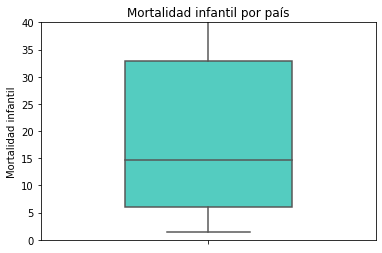

In [50]:
sns.boxplot(y = "infantmortality_k", 
            data = df, 
            width = 0.5, 
            color = "turquoise", 
            )
plt.title("Mortalidad infantil por país")
plt.ylabel("Mortalidad infantil");

# cambiamos el límite del eje y
plt.ylim([0, 40]);

In [ ]:

#6, 15 33

df['infant_mortality'].describe()

low_limit = 10  # Ejemplo: valor bajo de mortalidad infantil
high_limit = 50  # Ejemplo: valor alto de mortalidad infantil

# Clasifica los países en categorías
def categorize_mortality(rate):
    if rate < low_limit:
        return 'Baja'
    elif low_limit <= rate < high_limit:
        return 'Moderada'
    else:
        return 'Alta'

# Aplica la función para categorizar la mortalidad infantil
data['mortality_category'] = data['infant_mortality'].apply(categorize_mortality)

# Muestra un resumen de la clasificación
print(data[['Country', 'infant_mortality', 'mortality_category']])
